In [35]:
from corsikaio import CorsikaParticleFile, CorsikaFile, CorsikaCherenkovFile
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from decimal import Decimal
import tempfile, shutil

SAVE_FILE = True

MUON_MASS = 105.661e-3 # GeV
ELEC_MASS = 0.5101e-3 # GeV

# Dictionary associating particle mass to particle ID number 
mass_lept_dict = {
    1 : 0.0, 
    2 : ELEC_MASS, 
    3 : ELEC_MASS, 
    5 : MUON_MASS, 
    6 : MUON_MASS
}

part_id_lept = {1 : 'gamma', 2 : 'e+', 3 : 'e-',
          5 : 'mu+', 
          6 : 'mu-',
          }

id_list = part_id_lept.keys()

In [36]:
a = 7.1
a in part_id_lept.keys()

False

In [37]:

#f_input = "/Users/workspace/Software/Pierre_Tank/CORSIKA_Showers/Auger/p/DAT010000"
#def strip_runh(path):
#    with open(path, "rb") as f:
#        # read first 4 bytes = record length
#        nbytes = int.from_bytes(f.read(4), "little", signed=True)
#        f.seek(nbytes + 4, 1)  # skip block data + trailing length
#
#        # copy the rest to a temp file
#        tmp = tempfile.NamedTemporaryFile(delete=False)
#        shutil.copyfileobj(f, tmp)
#        tmp.close()
#    return tmp.name
#
#particle_file = strip_runh(f_input)
#
#
#with CorsikaFile(particle_file) as f:
#    rh = f.run_header
#    #f.parse_data_blocks
#    print(dir(f))
#    f.parse_data_blocks
#    print(f.run_end)
#    for event in f: print(event)


In [38]:
#with CorsikaFile("/Users/workspace/Software/Pierre_Tank/CORSIKA_Showers/Auger/p/DAT010000") as f:
##with CorsikaFile("/Users/workspace/Software/Pierre_Tank/CORSIKA_Showers/IceCube/DAT603477") as f:
#    rh = f.run_header
#    print(rh)
#    #f.parse_data_blocks
#    data_event = f.EventClass
#    print(data_event['data'])
#    for event in f:
#        print('Iteration')
#        print(event)


In [39]:
GROUND_LEVEL = 1
M_PROTON = 0.938272  # GeV/c^2

## Particles are stored separately for each observation level.
## The level number is encoded in the unit digit of the particle ID in the .DAT file
## Observation Level Number:
## obs_level = N % 10
## (The last digit)
## 
## Hadronic Generation:
## hadr_gen = (N // 10) % 100
## (Remove the last digit, then take the next two digits)
## 
## Particle ID:
## part_id = N // 1000
## (Remove last three digits)

energy_gamma = []
energy_elec = []
energy_mu = []

p_id = []
e_kin = []

x_coor = [] 
y_coor = []

cx = [] 
cy = []

t = [] 
w = [] 

header_string = str()

#with CorsikaParticleFile("/Users/workspace/Software/Pierre_Tank/CORSIKA_Showers/Auger/Fe/DAT091221") as f:
with CorsikaParticleFile("/Users/workspace/Software/Pierre_Tank/CORSIKA_Showers/IceCube/Fe/DAT601223") as f:
    for event in f:
        print(event)
        print('Part ID\tEnergy\tZenith\tAzimuth')
        header_string += str(event.header['particle_id'])+'\t'+"{:.2E}".format(Decimal(str(event.header['total_energy'])))+'\t'+ str(event.header['zenith'])+'\t'+ str(event.header['azimuth'])
        print(event.header['total_energy'],'\t',event.header['particle_id'],'\t', event.header['zenith'],'\t', event.header['azimuth'])
        print(event.header.dtype)
        print(event.particles.dtype)

        for part in event.particles:
            pid = part['particle_description'] // 1000 # integer division (or floor division), returns only  the integer part of the division 
            obs_lvl = part['particle_description'] % 10   # Modulus operation 

            if(obs_lvl == GROUND_LEVEL and int(pid) in id_list): # Modulus operation 
                ptot = np.sqrt(part['px']**2 + part['py']**2 + part['pz']**2)
                mass = mass_lept_dict[pid]
                ekin = np.sqrt(ptot**2 + mass**2) - mass 

                theta = np.arccos(part['pz']/ptot)
                phi = np.arctan2(part['px'],part['py'])

                part_cx = np.sin(theta) * np.cos(phi)
                part_cy = np.sin(theta) * np.sin(phi)

                if(pid==1): energy_gamma.append(ekin)
                if(pid==2 or pid==3): energy_elec.append(ekin)
                if(pid==5 or pid==6): energy_mu.append(ekin)

                p_id.append(pid)
                e_kin.append(ekin)
                x_coor.append(part['x']*0.01)
                y_coor.append(part['y']*0.01)
                cx.append(part_cx)
                cy.append(part_cy)

                t.append(part['t']) 
                w.append(1)



ParticleEvent(header=np.void((b'EVTH', 1.0, 5626.0, 1117452.8, 0.0, 0.0, -2805715.0, -356957.2, -15067.938, 1058799.0, 0.32543686, -3.0994055, 3.0, [[4601223.0, 0.0, 0.0], [4601224.0, 0.0, 0.0], [4601225.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], 601223.0, 230131.0, 7.75, 1.0, [284000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], -1.0, 1000000.0, 1258925.4, 0.05, 0.05, 0.01, 0.002, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 16.75, -51.96, 1.0, 0.0, 3.0, 2.0, 0.0, 1.0, 2.0, 3.0, 0.0, 65.0, 0.0, 359.99, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.1066124, 1.0, 1.0, 0.0, 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 200000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 80.0, 0.0, 0.0, 11279970.0, 1.0, 0.0, 0.0, 0.0

Total number of particles:  1229582
Total number of particles:  163369
Total number of particles:  23472


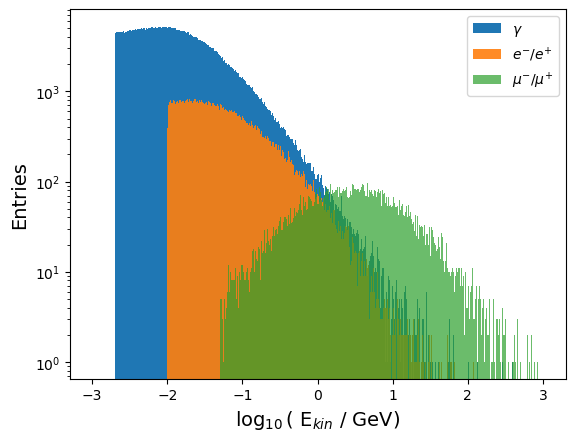

In [40]:
ebins = np.linspace(-3,3,1000)
plt.hist(np.log10(energy_gamma), bins=ebins, label=r'$\gamma$')
plt.hist(np.log10(energy_elec), bins=ebins, label=r'$e^{-}/e^{+}$',alpha=0.9)
plt.hist(np.log10(energy_mu),bins=ebins, label=r'$\mu^{-}/\mu^{+}$',alpha=0.7)
plt.yscale('log')
plt.xlabel(r'$\log_{10}$( E$_{kin}$ / GeV)',size=14)
plt.ylabel('Entries',size=14)
plt.legend()

for l in [energy_gamma, energy_elec, energy_mu]: 
    print('Total number of particles: ',len(l))

Text(0.5, 0, 'y / m')

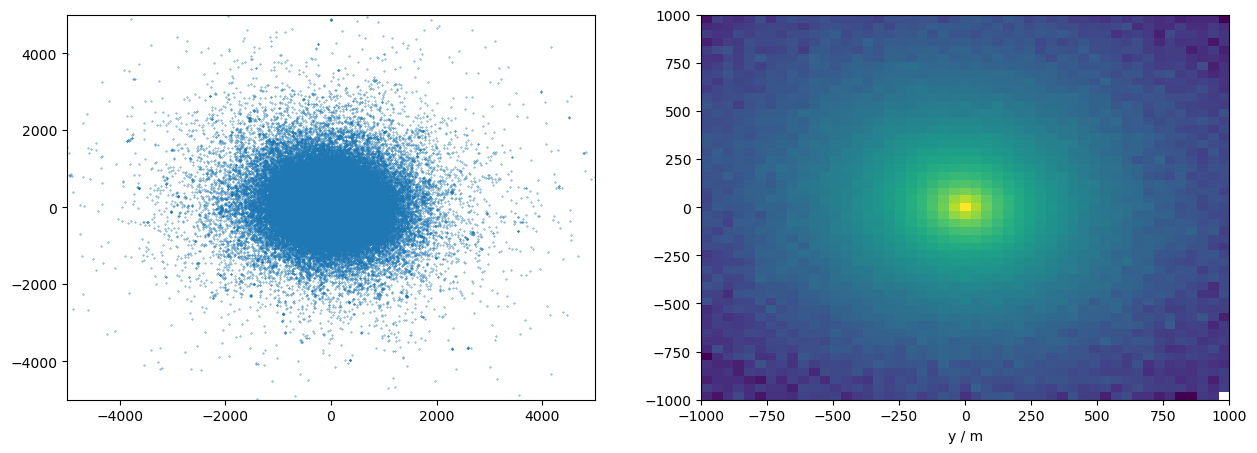

In [41]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)

plt.scatter(x_coor, y_coor, s=0.1)
plt.xlim(-5e3,5e3)
plt.ylim(-5e3,5e3)

plt.subplot(1,2,2)
xy_bins = np.linspace(-1e3,1e3)
plt.hist2d(x_coor,y_coor, bins=xy_bins, norm=mpl.colors.LogNorm())
plt.xlabel('x / m')
plt.xlabel('y / m')

In [42]:
print(header_string)

5626.0	1.12E+6	0.32543686	-3.0994055


In [43]:
if(SAVE_FILE):
    # CORSIKA units
    # Units of energy are GeV
    # Units of space are cm, need to convert to m for Pierre code! 
    # Units of time are ns

    stacked_array = np.column_stack((int(p_id), e_kin, x_coor, y_coor, cx, cy, t, w))  # shape: (3, 2)
    
    
    n_cols = stacked_array.shape[1]
    fmt_custom = ['%d'] + ['%.5f'] * (n_cols - 1)
    
    #np.savetxt('./allpart_timezero.dat',stacked_array_rnd_smallsize,delimiter='\t', fmt=fmt_custom, header='5626        1e+17        1.1170107        5.6344995')
    np.savetxt('./Fe_DAT601223.dat',stacked_array,delimiter='\t', fmt=fmt_custom, header=header_string,comments='')


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'